# Linear Discriminant Analysis Lab - MSc Data Science UCA


In [1]:
install.packages("pgmm") # we'll use this package to load the data
install.packages("mvtnorm")


Installing package into ‘/home/joris/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joris/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [3]:
library(pgmm)
library(mvtnorm)


Let's first load the wine data that we saw in the previous lecture.


In [4]:
data(wine)
head(wine)


,Type,Alcohol,Sugar-free Extract,Fixed Acidity,Tartaric Acid,Malic Acid,Uronic Acids,pH,Ash,Alcalinity of Ash,⋯,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,OD280/OD315 of Flavanoids,Glycerol,2-3-Butanediol,Total Nitrogen,Proline,Methanol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,14.23,24.82,73.1,1.21,1.71,0.72,3.38,2.43,15.6,⋯,2.29,5.64,1.04,3.92,4.77,9.29,757,153,1065,113
2,1,13.20,26.30,72.8,1.84,1.78,0.71,3.30,2.14,11.2,⋯,1.28,4.38,1.05,3.40,3.80,8.93,881,194,1050,94
3,1,13.16,26.30,68.5,1.94,2.36,0.84,3.48,2.67,18.6,⋯,2.81,5.68,1.03,3.17,3.46,11.74,900,206,1185,125
4,1,14.37,25.85,74.9,1.59,1.95,0.72,3.43,2.50,16.8,⋯,2.18,7.80,0.86,3.45,3.54,10.13,1119,292,1480,80
5,1,13.24,26.05,83.5,1.30,2.59,1.10,3.42,2.87,21.0,⋯,1.82,4.32,1.04,2.93,3.22,10.27,799,215,735,73
6,1,14.20,28.40,79.9,2.14,1.76,0.96,3.39,2.45,15.2,⋯,1.97,6.75,1.05,2.85,3.16,10.85,865,364,1450,68


For simplicity, we'll only look at two features: alcohol content and acidity. The label will also be binarised: Barolo wine versus not Barolo.


In [5]:
X <- as.matrix(wine[, c(2, 4)])
y <- (wine$Type == 1)


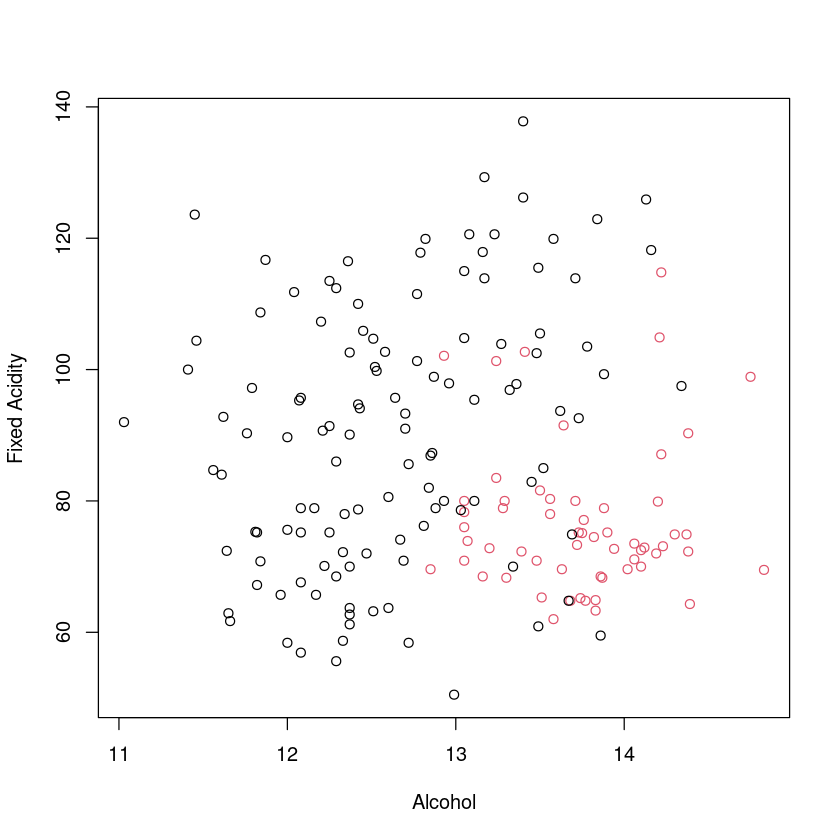

In [6]:
plot(X, col = y + 1)


Implement the Linear Discriminant Analysis (LDA) algorithm that we saw in the last lecture. LDA assumes that each class follows a Gaussian distribution with identical covariance but different means:
$$p(x|0) = \mathcal{N}(x|\mu_0, \Sigma),$$
$$p(x|1) = \mathcal{N}(x|\mu_1, \Sigma).$$

For this, you must infer $\mu_0$, $\mu_1$, and $\Sigma$ using maximum likelihood, as seen in the lectures.


In [21]:
install.packages("tidyverse")


Installing package into ‘/home/joris/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘generics’, ‘blob’, ‘DBI’, ‘tidyselect’, ‘data.table’, ‘gargle’, ‘ids’, ‘openssl’, ‘vroom’, ‘tzdb’, ‘broom’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘httr’, ‘lubridate’, ‘modelr’, ‘readr’, ‘reprex’, ‘rvest’, ‘tidyr’


Warning message in install.packages("tidyverse"):
“installation of package ‘openssl’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ids’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘httr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘gargle’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘rvest’ had non-zero exit status”
Warning message in install.packages("tidyverse")

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


In [26]:
X[y == 1]


[1]  14.23  13.20  13.16  14.37  13.24  14.20  14.39  14.06  14.83  13.86
 [11]  14.10  14.12  13.75  14.75  14.38  13.63  14.30  13.83  14.19  13.64
 [21]  14.06  12.93  13.71  12.85  13.50  13.05  13.39  13.30  13.87  14.02
 [31]  13.73  13.58  13.68  13.76  13.51  13.48  13.28  13.05  13.07  14.22
 [41]  13.56  13.41  13.88  13.24  13.05  14.21  14.38  13.90  14.10  13.94
 [51]  13.05  13.83  13.82  13.77  13.74  13.56  14.22  13.29  13.72  73.10
 [61]  72.80  68.50  74.90  83.50  79.90  64.30  73.50  69.50  68.50  72.50
 [71]  72.90  75.10  98.90  72.30  69.60  74.90  64.90  72.00  91.50  71.10
 [81] 102.10  80.00  69.60  81.60  78.30  72.30  68.30  68.30  69.60  75.20
 [91]  62.00  64.80  77.10  65.30  70.90  78.90  70.90  73.90 114.80  80.30
[101] 102.70  78.90 101.30  80.00 104.90  90.30  75.20  70.00  72.70  76.00
[111]  63.30  74.50  64.80  65.20  78.00  87.10  80.00  73.30

In [62]:
N <- length(y)
N1 <- sum(y == 1)
pi <- N1 / N

# Means
mu1 <- colMeans(X[y == 1, ])
mu2 <- colMeans(X[y != 1, ])

# Coefficients
w1 <- pi
w2 <- 1 - pi

# Covariances
cov1 <- cov(X[y == 1, ])
cov2 <- cov(X[y != 1, ])

sigma <- (w1 * cov1) + (w2 * cov2)
sigma


,Alcohol,Fixed Acidity
Alcohol,0.3846606,2.708836
Fixed Acidity,2.7088362,311.991616


In [67]:
sig <- function(x) {
    1 / (1 - exp(-x))
}
sig(0)


[1] Inf

In [83]:
# Probability of x given class 1 (resp. class 2)

prob_x_class1 <- dmvnorm(X, mean = mu1, sigma = sigma)
prob_x_class2 <- dmvnorm(X, mean = mu2, sigma = sigma)


In [85]:
prob_class1_x <- prob_x_class1 * pi / (prob_x_class1 * pi + prob_x_class2 * (1 - pi))
prob_class1_x


1            2            3            4            5            6 
9.730892e-01 5.261417e-01 5.694259e-01 9.808137e-01 3.698148e-01 9.523072e-01 
           7            8            9           10           11           12 
9.915809e-01 9.516868e-01 9.972407e-01 9.347184e-01 9.604168e-01 9.618779e-01 
          13           14           15           16           17           18 
8.593529e-01 9.704501e-01 9.845752e-01 8.580663e-01 9.757782e-01 9.437358e-01 
          19           20           21           22           23           24 
9.715676e-01 5.620810e-01 9.590696e-01 5.054610e-02 7.890915e-01 2.983983e-01 
          25           26           27           28           29           30 
6.199046e-01 3.092743e-01 6.872665e-01 6.836025e-01 9.376157e-01 9.579707e-01 
          31           32           33           34           35           36 
8.500045e-01 8.983281e-01 9.102414e-01 8.454461e-01 8.457874e-01 7.676118e-01 
          37           38           39           40           41           42 
4.839459e-01 4.333073e-01 3.971720e-01 6.314190e-01 6.872574e-01 2.070169e-01 
          43           44           45           46           47           48 
8.784142e-01 1.394038e-01 2.836450e-01 7.721017e-01 9.455526e-01 9.099585e-01 
          49           50           51           52           53           54 
9.667458e-01 9.327698e-01 3.458831e-01 9.495735e-01 8.900761e-01 9.323176e-01 
          55           56           57           58           59           60 
9.235673e-01 7.218501e-01 9.269994e-01 4.725880e-01 8.627131e-01 1.850891e-02 
          61           62           63           64           65           66 
5.665427e-02 3.056041e-02 9.074221e-01 7.465751e-02 5.280649e-02 1.203267e-01 
          67           68           69           70           71           72 
3.268913e-01 1.128798e-01 6.864458e-01 1.036734e-02 1.482842e-01 9.648513e-01 
          73           74           75           76           77           78 
8.756724e-01 7.315929e-01 2.655878e-02 1.295698e-02 2.904361e-01 8.085598e-04 
          79           80           81           82           83           84 
1.375027e-01 4.397010e-02 5.033307e-02 3.805145e-01 7.197483e-02 6.180871e-02 
          85           86           87           88           89           90 
1.238703e-02 1.427196e-01 2.032279e-02 1.149948e-02 5.624816e-03 3.453849e-02 
          91           92           93           94           95           96 
1.555475e-02 1.504874e-02 1.834102e-01 1.895495e-02 1.207196e-03 8.935003e-02 
          97           98           99          100          101          102 
8.112907e-03 6.410330e-02 1.322895e-01 2.855306e-03 2.023023e-02 2.177220e-01 
         103          104          105          106          107          108 
3.924580e-02 1.497393e-02 1.752172e-01 4.850977e-02 3.551472e-02 7.911871e-02 
         109          110          111          112          113          114 
4.587307e-02 2.202652e-03 3.029666e-04 1.469781e-02 2.326526e-03 3.512940e-04 
         115          116          117          118          119          120 
4.666661e-03 1.719558e-04 8.451767e-03 1.577648e-02 3.168816e-02 5.481038e-03 
         121          122          123          124          125          126 
7.306439e-05 1.767087e-03 5.273465e-03 3.054477e-02 5.022578e-04 4.643019e-03 
         127          128          129          130          131          132 
1.702478e-02 1.565554e-03 7.578892e-03 1.275615e-03 1.090079e-01 1.938170e-01 
         133          134          135          136          137          138 
1.871946e-01 5.151707e-02 1.045422e-02 7.577794e-02 1.128223e-02 1.586214e-02 
         139          140          141          142          143          144 
1.195787e-01 1.436015e-01 2.083665e-01 2.388864e-01 5.772084e-01 5.056141e-01 
         145          146          147          148          149          150 
2.302669e-03 3.581414e-02 6.229845e-01 5.186949e-02 2.262120e-01 2.274443e-02 
         151          152          153          154          

In [89]:
y_hat <- prob_class1_x > 0.5
mean(y_hat != y)


[1] 0.1404494